The seminar is partially based on [DLA Course](https://github.com/markovka17/dla/blob/2023/week10/antispoofing_seminar.ipynb)

# ASVspoof Challenge and Datasets

[ASVspoof](https://www.asvspoof.org/) initiative is the modern standard in Anti-Spoofing research. ASVspoof Challenges (2015, 2017, 2019, 2021, 2024 (5)) provide data and define rules/metrics for comparison of different Countermeasure Systems (CMs). Since 2022, development of Spoofing-Aware Speaker Verifiction (SASV) systems has been included.

ASVspoof 5 Challenge is the most modern version, however it is large. We will use conventional ASVspoof Challenge 2019\2021 Datasets. They include data for 3 tasks:

1. Logical Access (LA): detection of synthesized speech

2. Physical Access (PA): detection of replay attacks (recorded speech)

3. DeepFake (DF, Only in 2021): similar to LA but with emphasis on deceiving real people (not ASV system)

ASVspoof 2019 Dataset in also available in [Kaggle](https://www.kaggle.com/datasets/awsaf49/asvpoof-2019-dataset).

The structure of the Dataset is the following:

```
ASVspoof2019
    --> LA
        --> ASVspoof2019_LA_asv_protocols # Protocols for SASV evaluation and t-DCF metric
        --> ASVspoof2019_LA_asv_scores # ASV scores for utterances. Required for SASV evaluation and t-DCF metric
        --> ASVspoof2019_LA_cm_protocols # Protocols for training and evaluation of CM systems
        --> ASVspoof2019_LA_dev # Development Set
        --> ASVspoof2019_LA_eval # Evaluation Set
        --> ASVspoof2019_LA_train # Training Set
            --> flac
                --> LA_T_*******.flac # Utterance
    --> PA
```

Protocol defines whether utterance is bona-fide or spoofed. For CMs, it looks like this:

```
|   SpeakerID | UtteranceID   | UtteranceType? | SpoofAlgoId | IsSpoofed |
|   LA_0079   | LA_T_3999087  |       -        |      -      | bonafide  |
|   LA_0079   | LA_T_3851087  |       -        |     A01     |   spoof   |
```

For ASV evaluation, it looks like this:
```
|   SpeakerID | UtteranceID   | SpoofAlgoId | AttackType |
|   LA_0072   | LA_D_4356541  |   bonafide  |   target   |
|   LA_0078   | LA_D_5490922  |   bonafide  |  nontarget |
|   LA_0072   | LA_D_8889390  |     A01     |   spoof    |
```

For getting owner's genuine embeddings, ASV requires some bona-fide examples of speech for each speaker. The corresponding protocol looks like this:

```
|   SpeakerID |             UtteranceID           |
|   LA_0072   | LA_D_A1046944,LA_D_A1519783, ...  |
```

---

For PA task protocols are similar. Here is for CM:

```
|   SpeakerID | UtteranceID   | UtteranceType?   | SpoofAlgoId | IsSpoofed |
|   PA_0079   | PA_T_0000001  |       aaa        |      -      | bonafide  |
|   PA_0079   | PA_T_0007745  |       aab        |      AC     |   spoof   |
```

For ASV, likewise, there are changes in Utterance Types and Algorithms IDs.

For getting owner's genuine embeddings, similarly, we get bona-fide speech for different Utterance Types.

---

The list of spoofing alogrithms presented in the Dataset and their definitions are presented in the paper ["ASVspoof 2019: A large-scale public database of synthesized, converted and replayed
speech"](https://arxiv.org/pdf/1911.01601.pdf)

---

Let's download Dataset and look at the example.

### Dowloading Dataset

In [ ]:
!curl -L -o asvpoof-2019-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/awsaf49/asvpoof-2019-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23.5G  100 23.5G    0     0  99.4M      0  0:04:02  0:04:02 --:--:--  153M


In [ ]:
!unzip -q ./asvpoof-2019-dataset.zip

In [ ]:
!ls

asvpoof-2019-dataset.zip		     LA		       README.txt
asvspoof2019_evaluation_plan.pdf	     LICENSE_text.txt  sample_data
asvspoof2019_Interspeech2019_submission.pdf  PA


### Examples


#### LA

Firstly, let's look at the LA task.

In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker LA_0079

bonafide_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'
spoof1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3851087.flac' # A01 (TTS)
spoof2_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_7962577.flac' # A05 (VC)


bonafide_audio, sr = torchaudio.load(bonafide_path)
spoof1_audio, sr = torchaudio.load(spoof1_path)
spoof2_audio, sr = torchaudio.load(spoof2_path)

In [ ]:
Audio(bonafide_audio, rate=sr)

In [ ]:
Audio(spoof1_audio, rate=sr)

In [ ]:
Audio(spoof2_audio, rate=sr)

These spoofing examples are easy for human ear, but let's check utterances with harder algorithms.

In [ ]:
spoof3_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_4920751.flac' # A17 (VC)

spoof3_audio, sr = torchaudio.load(spoof3_path)
Audio(spoof3_audio, rate=sr)

More real! Let's guess are the following utterances real or not:

In [ ]:
question_1_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7991213.flac'

question_1_audio, sr = torchaudio.load(question_1_path)
Audio(question_1_audio, rate=sr)

In [ ]:
# @title

# It is bona-fide

In [ ]:
question_2_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_5118048.flac'

question_2_audio, sr = torchaudio.load(question_2_path)
Audio(question_2_audio, rate=sr)

In [ ]:
# @title

# It is A19 (VC)

In [ ]:
question_3_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7999782.flac'

question_3_audio, sr = torchaudio.load(question_3_path)
Audio(question_3_audio, rate=sr)

In [ ]:
# @title

# It is A14 (TTS + VC)

In [ ]:
question_4_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_9648263.flac'

question_4_audio, sr = torchaudio.load(question_4_path)
Audio(question_4_audio, rate=sr)

In [ ]:
# @title

# It is A14 (TTS + VC)

#### PA

Now let's look at the PA task:

In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker PA_0079

PA_bonafide1_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0000001.flac' # aaa
PA_bonafide2_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0000203.flac' # aab
PA_bonafide3_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0001409.flac' # acb

PA_spoof1_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0006696.flac' # aaa BB
PA_spoof2_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0007745.flac' # aab AC
PA_spoof3_path = './PA/PA/ASVspoof2019_PA_train/flac/PA_T_0018256.flac' # acb AB


PA_bonafide1_audio, PA_sr = torchaudio.load(PA_bonafide1_path)
PA_bonafide2_audio, PA_sr = torchaudio.load(PA_bonafide2_path)
PA_bonafide3_audio, PA_sr = torchaudio.load(PA_bonafide3_path)

PA_spoof1_audio, PA_sr = torchaudio.load(PA_spoof1_path)
PA_spoof2_audio, PA_sr = torchaudio.load(PA_spoof2_path)
PA_spoof3_audio, PA_sr = torchaudio.load(PA_spoof3_path)

In [ ]:
Audio(PA_bonafide1_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof1_audio, rate=PA_sr)

In [ ]:
Audio(PA_bonafide2_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof2_audio, rate=PA_sr)

In [ ]:
Audio(PA_bonafide3_audio, rate=PA_sr)

In [ ]:
Audio(PA_spoof3_audio, rate=PA_sr)

# Sinc-Layer

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import sys
from torch.autograd import Variable
import math

%matplotlib inline
import scipy.signal as dsp
from scipy import fft
import torchaudio
#torchaudio.set_audio_backend("sox_io")
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

Note that eq. (4) in the [SincNet Paper](https://arxiv.org/pdf/1808.00158.pdf) is symmetric:

$$
n \in [-L, L]
$$
$$
g[n, f_1, f_2] = 2f_2 \cdot \mathop{sinc}(2\pi f_2n) - 2f_1 \cdot \mathop{sinc}(2\pi f_1n)
$$
$$
\mathop{sinc}(-x) = \frac{\sin(-x)}{-x} = \frac{-\sin(x)}{-x} = \frac{\sin(x)}{x} = \mathop{sinc}(x)
$$

Hence $g[k] = g[-k]$. Moreover $g[0] = 2 f_2  - 2 f_1 = 2(f_2 - f_1)$

---

Let $S = \frac{2\pi n}{\text{sample_rate}}$. Note that we can rewrite eq. (4) in a simpler (for computing) form:

$$
2f_2 \cdot \mathop{sinc}(2\pi f_2n) - 2f_1 \cdot \mathop{sinc}(2\pi f_1n) = 2 f_2 \frac{sin(2\pi f_2 n)}{2 \pi f_2 n} - 2 f_1 \frac{sin(2\pi f_1 n)}{2 \pi f_1 n} =
$$

$$
= \frac{sin(2\pi f_2 n)}{\pi n} - \frac{sin(2\pi f_1 n)}{\pi n} =
\frac{sin(2\pi f_2 n)}{\frac{2\pi n}{\text{sample_rate}} \cdot {\frac{\text{sample_rate}}{2}}} - \frac{sin(2\pi f_1 n)}{\frac{2\pi n}{\text{sample_rate}} \cdot {\frac{\text{sample_rate}}{2}}} =
$$

$$
= \frac{1}{\text{sample_rate}} \cdot \frac{sin(2\pi f_2 n) - sin(2\pi f_1 n)}{S / 2}
$$


In [ ]:
class SincConv_fast(nn.Module):
    """Sinc-based convolution
    Parameters
    ----------
    in_channels : `int`
        Number of input channels. Must be 1.
    out_channels : `int`
        Number of filters.
    kernel_size : `int`
        Filter length.
    sample_rate : `int`, optional
        Sample rate. Defaults to 16000.
    Usage
    -----
    See `torch.nn.Conv1d`
    Reference
    ---------
    Mirco Ravanelli, Yoshua Bengio,
    "Speaker Recognition from raw waveform with SincNet".
    https://arxiv.org/abs/1808.00158
    """

    @staticmethod
    def to_mel(hz):
        return 2595 * np.log10(1 + hz / 700)

    @staticmethod
    def to_hz(mel):
        return 700 * (10 ** (mel / 2595) - 1)

    def __init__(self, out_channels, kernel_size, sample_rate=16000, in_channels=1,
                 stride=1, padding=0, dilation=1, bias=False, groups=1, min_low_hz=50, min_band_hz=50):

        super(SincConv_fast,self).__init__()

        if in_channels != 1:
            #msg = (f'SincConv only support one input channel '
            #       f'(here, in_channels = {in_channels:d}).')
            msg = "SincConv only support one input channel (here, in_channels = {%i})" % (in_channels)
            raise ValueError(msg)

        self.out_channels = out_channels
        self.kernel_size = kernel_size

        # Forcing the filters to be odd (i.e, perfectly symmetrics)
        if kernel_size%2==0:
            self.kernel_size=self.kernel_size+1

        self.stride = stride
        self.padding = padding
        self.dilation = dilation

        if bias:
            raise ValueError('SincConv does not support bias.')
        if groups > 1:
            raise ValueError('SincConv does not support groups.')

        self.sample_rate = sample_rate
        self.min_low_hz = min_low_hz
        self.min_band_hz = min_band_hz

        # initialize filterbanks such that they are equally spaced in Mel scale
        low_hz = 0
        high_hz = self.sample_rate / 2 - (self.min_low_hz + self.min_band_hz)

        # In the future we will set high hz as band_hz + low + min_band_hz + min_low_hz
        # Where band_hz is (high_hz - low_hz). Therefore, it is reasonable to
        # do diff and do not set high_hz as sr/2

        mel = np.linspace(self.to_mel(low_hz),
                          self.to_mel(high_hz),
                          self.out_channels + 1)
        hz = self.to_hz(mel)


        # filter lower frequency (out_channels, 1)
        self.low_hz_ = nn.Parameter(torch.Tensor(hz[:-1]).view(-1, 1)) # learnable f1 from the paper

        # filter frequency band (out_channels, 1)
        self.band_hz_ = nn.Parameter(torch.Tensor(np.diff(hz)).view(-1, 1)) # learnable f2 (f2 = f1+diff) from the paper

        # len(g) = kernel_size
        # It is symmetric, therefore we will do computations only with left part, while creating g.

        # Hamming window
        #self.window_ = torch.hamming_window(self.kernel_size)
        n_lin=torch.linspace(0, (self.kernel_size/2)-1, steps=int((self.kernel_size/2))) # computing only half of the window
        self.window_=0.54-0.46*torch.cos(2*math.pi*n_lin/self.kernel_size);

        # self.window is eq. (8)


        # (1, kernel_size/2)
        n = (self.kernel_size - 1) / 2.0
        self.n_ = 2*math.pi*torch.arange(-n, 0).view(1, -1) / self.sample_rate # Due to symmetry, I only need half of the time axes

        # self.n_ = 2 * pi * n / sr


    def forward(self, waveforms):
        """
        Parameters
        ----------
        waveforms : `torch.Tensor` (batch_size, 1, n_samples)
            Batch of waveforms.
        Returns
        -------
        features : `torch.Tensor` (batch_size, out_channels, n_samples_out)
            Batch of sinc filters activations.
        """

        self.n_ = self.n_.to(waveforms.device)

        print('self.n_', self.n_)
        print('--------------------')

        self.window_ = self.window_.to(waveforms.device)

        low = self.min_low_hz  + torch.abs(self.low_hz_) # eq. (5) + make sure low >= min_low_hz

        high = torch.clamp(low + self.min_band_hz + torch.abs(self.band_hz_),self.min_low_hz,self.sample_rate/2) # eq. (6) + make sure band has length >= min_band_hz
        band=(high-low)[:,0] # g[0] / 2

        print('band', band)
        print('low', low)
        print('high', high)
        print('--------------------')

        f_times_t_low = torch.matmul(low, self.n_) # 2 * pi * n * freq / sr
        f_times_t_high = torch.matmul(high, self.n_)

        print('times_t_low', f_times_t_low)
        print('times_t_high', f_times_t_high)
        print('--------------------')

        # 2*f2*sinc(2*pi*f2*n) - 2*f1*sinc(2*pi*f1*n)
        # 2*f2*sin(2*pi*f2*n) / (2 * pi * f2 * n) - 2*f1*sin(2*pi*f1*n) / (2 * pi * f1 * n)
        # sin(2*pi*f2*n) / (pi n) - sin(2*pi*f1*n) / (pi n)

        # (2 / sr) * sin(f_times_t_high) / self.n_ -  (2 / sr) * sin(f_times_t_low) / self.n_
        # (1/ sr) * (sin(f_times_t_high) - sin(f_times_t_low)) / (self.n_ / 2)

        # sr * correct eq. (4)

        # because self.n_ = 2 * pi * n / sr

        band_pass_left=((torch.sin(f_times_t_high)-torch.sin(f_times_t_low))/(self.n_/2))*self.window_ # Equivalent of Eq.4 of the reference paper (SPEAKER RECOGNITION FROM RAW WAVEFORM WITH SINCNET). I just have expanded the sinc and simplified the terms. This way I avoid several useless computations.
        band_pass_center = 2*band.view(-1,1) # g[0] = 2 * (f2 - f1) = 2 * band, w[0] = 1
        band_pass_right= torch.flip(band_pass_left,dims=[1]) # g[n] = g[-n]

        print('band_pass_left', band_pass_left)
        print('band_pass_center', band_pass_center)
        print('---------------')


        band_pass=torch.cat([band_pass_left,band_pass_center,band_pass_right],dim=1) # create full g[n]


        band_pass = band_pass / (2*band[:,None]) # normalize so the max is 1

        # band_pass_left = sr * correct (4)
        # center = freq (not scaled via division) = sr * scaled_freq
        # thus, after normalization we will divide all by sr and get normalized correct(4) + normalized center


        self.filters = (band_pass).view(
            self.out_channels, 1, self.kernel_size)

        return F.conv1d(waveforms, self.filters, stride=self.stride,
                        padding=self.padding, dilation=self.dilation,
                         bias=None, groups=1) # x[n] * g[n]


In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker LA_0079

audio_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'

audio, sr = torchaudio.load(audio_path)

In [ ]:
Audio(audio, rate=sr)

In [ ]:
audio.shape

torch.Size([1, 45641])

In [ ]:
model = SincConv_fast(out_channels=1, kernel_size=51, min_band_hz=0, min_low_hz=5000)

In [ ]:
sinc_audio = model(audio).detach()
print('sinc_audio', sinc_audio)
print('shape', sinc_audio.shape)

self.n_ tensor([[-0.0098, -0.0094, -0.0090, -0.0086, -0.0082, -0.0079, -0.0075, -0.0071,
         -0.0067, -0.0063, -0.0059, -0.0055, -0.0051, -0.0047, -0.0043, -0.0039,
         -0.0035, -0.0031, -0.0027, -0.0024, -0.0020, -0.0016, -0.0012, -0.0008,
         -0.0004]])
--------------------
band tensor([2970.], grad_fn=<SelectBackward0>)
low tensor([[5030.]], grad_fn=<AddBackward0>)
high tensor([[8000.]], grad_fn=<ClampBackward1>)
--------------------
times_t_low tensor([[-49.3819, -47.4066, -45.4314, -43.4561, -41.4808, -39.5055, -37.5303,
         -35.5550, -33.5797, -31.6044, -29.6291, -27.6539, -25.6786, -23.7033,
         -21.7280, -19.7528, -17.7775, -15.8022, -13.8269, -11.8517,  -9.8764,
          -7.9011,  -5.9258,  -3.9506,  -1.9753]], grad_fn=<MmBackward0>)
times_t_high tensor([[-78.5398, -75.3982, -72.2566, -69.1150, -65.9734, -62.8319, -59.6903,
         -56.5487, -53.4071, -50.2655, -47.1239, -43.9823, -40.8407, -37.6991,
         -34.5575, -31.4159, -28.2743, -25.1327, -

In [ ]:
def plot_audio(audio, axes, step=5):
    axes.plot(audio[0])
    axes.set_xticks(np.arange(audio.shape[1] + 1, step=audio.shape[1] / step),
                np.arange(audio.shape[1] + 1, step=audio.shape[1] / step) / sr)
    axes.set_xlabel('Time[sec]', fontsize=15)
    axes.set_ylabel('Amplitude', fontsize=15)

In [ ]:
def plot_freq(audio, axes, step=5):
    original_fft_data = np.absolute(fft.fft(audio[0], n=256))
    axes.plot(original_fft_data)
    xticks = axes.get_xticks()
    new_xticks = np.arange(xticks[-2], step=step)
    axes.set_xticks(new_xticks, (new_xticks * sr / 256))
    axes.set_xlabel('Frequency[Hz]')
    axes.set_ylabel('Magnitude')

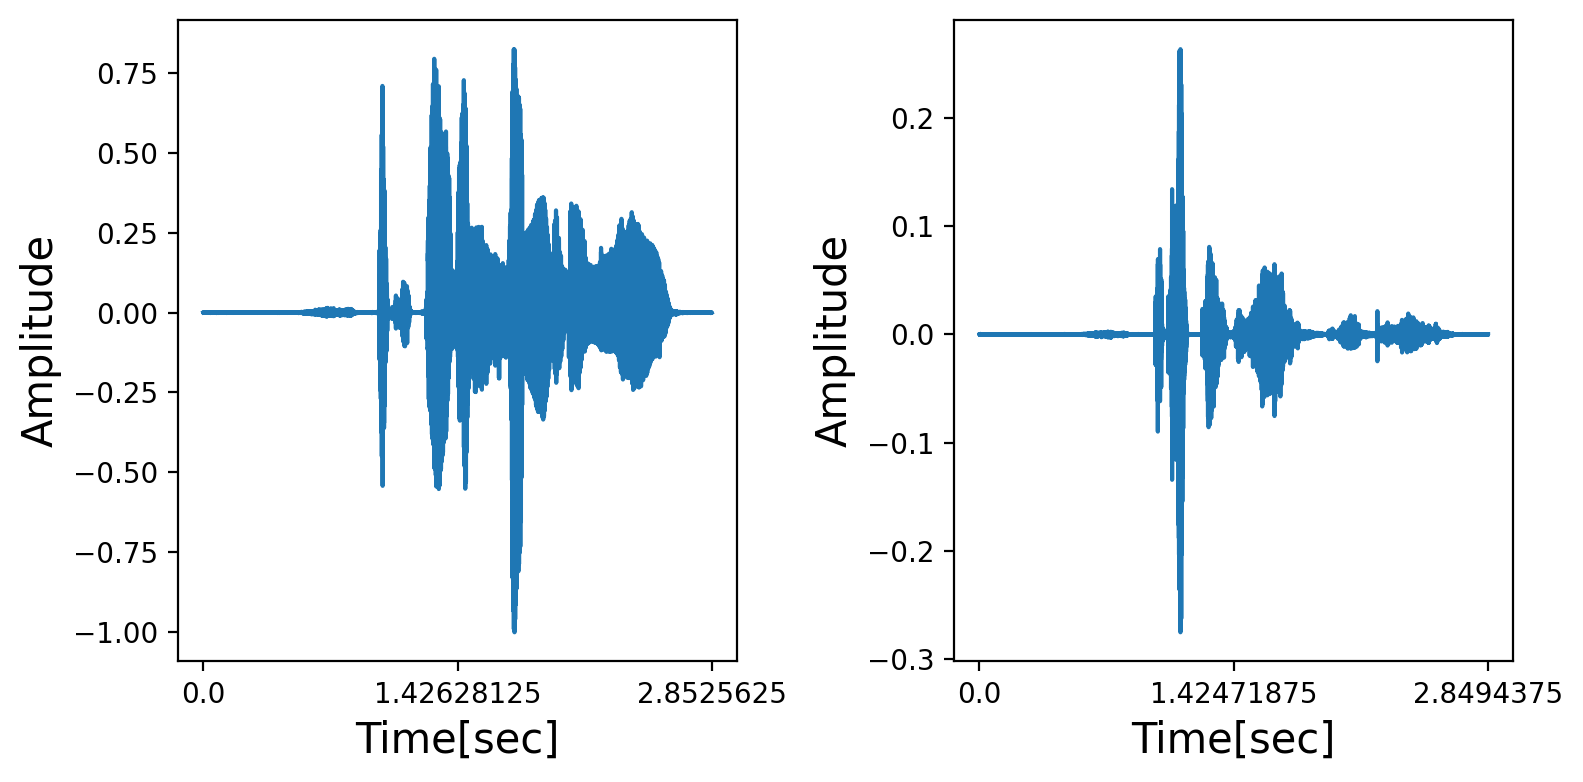

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_audio(audio, axes[0], step=2)
plot_audio(sinc_audio, axes[1], step=2)
fig.tight_layout()

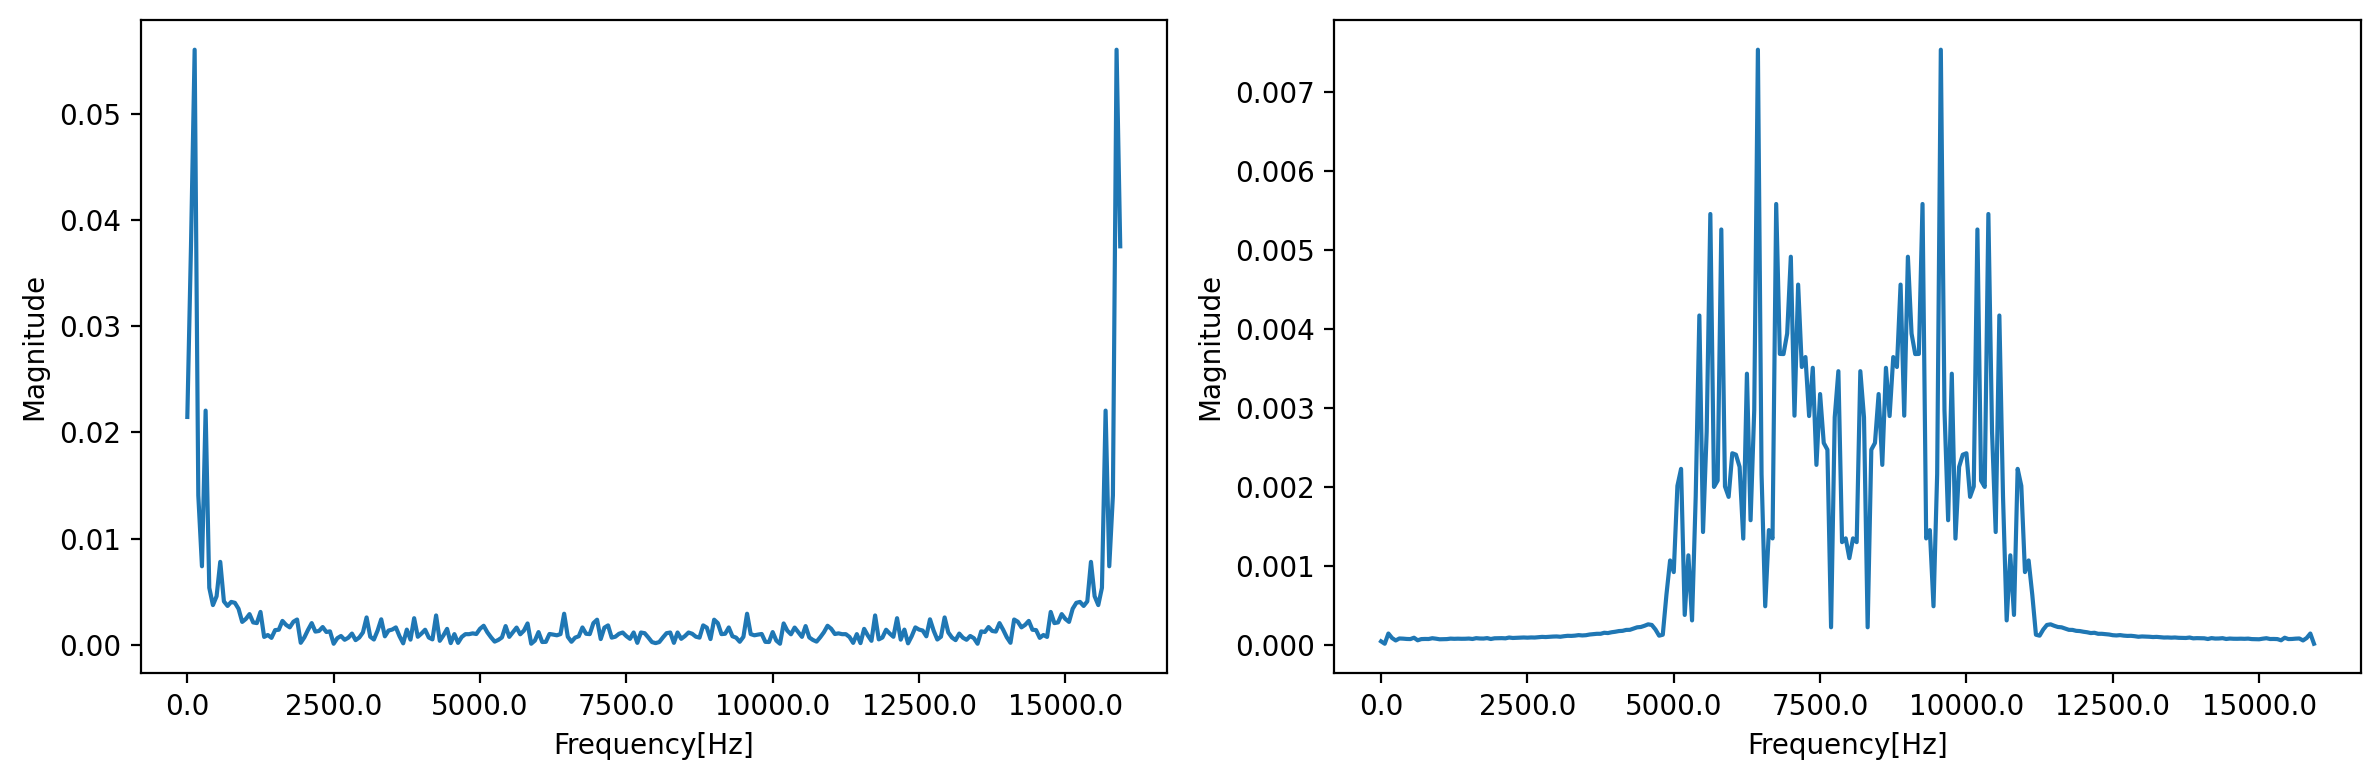

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_freq(audio.numpy(), axes[0], step=40)
plot_freq(sinc_audio.numpy(), axes[1], step=40)
fig.tight_layout()

In [ ]:
Audio(sinc_audio, rate=sr)

# XAI

For this part of the seminar, we need to have some model to work with. Let's download some pretrained deepfake detector

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
import numpy as np
from torch.utils import data
from collections import OrderedDict
from torch.nn.parameter import Parameter


___author__ = "Hemlata Tak"
__email__ = "tak@eurecom.fr"


class SincConv(nn.Module):
    @staticmethod
    def to_mel(hz):
        return 2595 * np.log10(1 + hz / 700)

    @staticmethod
    def to_hz(mel):
        return 700 * (10 ** (mel / 2595) - 1)


    def __init__(self, device,out_channels, kernel_size,in_channels=1,sample_rate=16000,
                 stride=1, padding=0, dilation=1, bias=False, groups=1):

        super(SincConv,self).__init__()

        if in_channels != 1:

            msg = "SincConv only support one input channel (here, in_channels = {%i})" % (in_channels)
            raise ValueError(msg)

        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.sample_rate=sample_rate

        # Forcing the filters to be odd (i.e, perfectly symmetrics)
        if kernel_size%2==0:
            self.kernel_size=self.kernel_size+1

        self.device=device
        self.stride = stride
        self.padding = padding
        self.dilation = dilation

        if bias:
            raise ValueError('SincConv does not support bias.')
        if groups > 1:
            raise ValueError('SincConv does not support groups.')


        # initialize filterbanks using Mel scale
        NFFT = 512
        f=int(self.sample_rate/2)*np.linspace(0,1,int(NFFT/2)+1)
        fmel=self.to_mel(f)   # Hz to mel conversion
        fmelmax=np.max(fmel)
        fmelmin=np.min(fmel)
        filbandwidthsmel=np.linspace(fmelmin,fmelmax,self.out_channels+1)
        filbandwidthsf=self.to_hz(filbandwidthsmel)  # Mel to Hz conversion
        self.mel=filbandwidthsf
        self.hsupp=torch.arange(-(self.kernel_size-1)/2, (self.kernel_size-1)/2+1)
        self.band_pass=torch.zeros(self.out_channels,self.kernel_size)



    def forward(self,x):
        for i in range(len(self.mel)-1):
            fmin=self.mel[i]
            fmax=self.mel[i+1]
            hHigh=(2*fmax/self.sample_rate)*np.sinc(2*fmax*self.hsupp/self.sample_rate)
            hLow=(2*fmin/self.sample_rate)*np.sinc(2*fmin*self.hsupp/self.sample_rate)
            hideal=hHigh-hLow

            self.band_pass[i,:]=Tensor(np.hamming(self.kernel_size))*Tensor(hideal)

        band_pass_filter=self.band_pass.to(self.device)

        self.filters = (band_pass_filter).view(self.out_channels, 1, self.kernel_size)

        return F.conv1d(x, self.filters, stride=self.stride,
                        padding=self.padding, dilation=self.dilation,
                         bias=None, groups=1)



class Residual_block(nn.Module):
    def __init__(self, nb_filts, first = False):
        super(Residual_block, self).__init__()
        self.first = first

        if not self.first:
            self.bn1 = nn.BatchNorm1d(num_features = nb_filts[0])

        self.lrelu = nn.LeakyReLU(negative_slope=0.3)

        self.conv1 = nn.Conv1d(in_channels = nb_filts[0],
			out_channels = nb_filts[1],
			kernel_size = 3,
			padding = 1,
			stride = 1)

        self.bn2 = nn.BatchNorm1d(num_features = nb_filts[1])
        self.conv2 = nn.Conv1d(in_channels = nb_filts[1],
			out_channels = nb_filts[1],
			padding = 1,
			kernel_size = 3,
			stride = 1)

        if nb_filts[0] != nb_filts[1]:
            self.downsample = True
            self.conv_downsample = nn.Conv1d(in_channels = nb_filts[0],
				out_channels = nb_filts[1],
				padding = 0,
				kernel_size = 1,
				stride = 1)

        else:
            self.downsample = False
        self.mp = nn.MaxPool1d(3)

    def forward(self, x):
        identity = x
        if not self.first:
            out = self.bn1(x)
            out = self.lrelu(out)
        else:
            out = x

        out = self.conv1(x)
        out = self.bn2(out)
        out = self.lrelu(out)
        out = self.conv2(out)

        if self.downsample:
            identity = self.conv_downsample(identity)

        out += identity
        out = self.mp(out)
        return out





class RawNet(nn.Module):
    def __init__(self, d_args, device):
        super(RawNet, self).__init__()


        self.device=device

        self.Sinc_conv=SincConv(device=self.device,
			out_channels = d_args['filts'][0],
			kernel_size = d_args['first_conv'],
                        in_channels = d_args['in_channels']
        )

        self.first_bn = nn.BatchNorm1d(num_features = d_args['filts'][0])
        self.selu = nn.SELU(inplace=True)
        self.block0 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][1], first = True))
        self.block1 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][1]))
        self.block2 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][2]))
        d_args['filts'][2][0] = d_args['filts'][2][1]
        self.block3 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][2]))
        self.block4 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][2]))
        self.block5 = nn.Sequential(Residual_block(nb_filts = d_args['filts'][2]))
        self.avgpool = nn.AdaptiveAvgPool1d(1)

        self.fc_attention0 = self._make_attention_fc(in_features = d_args['filts'][1][-1],
            l_out_features = d_args['filts'][1][-1])
        self.fc_attention1 = self._make_attention_fc(in_features = d_args['filts'][1][-1],
            l_out_features = d_args['filts'][1][-1])
        self.fc_attention2 = self._make_attention_fc(in_features = d_args['filts'][2][-1],
            l_out_features = d_args['filts'][2][-1])
        self.fc_attention3 = self._make_attention_fc(in_features = d_args['filts'][2][-1],
            l_out_features = d_args['filts'][2][-1])
        self.fc_attention4 = self._make_attention_fc(in_features = d_args['filts'][2][-1],
            l_out_features = d_args['filts'][2][-1])
        self.fc_attention5 = self._make_attention_fc(in_features = d_args['filts'][2][-1],
            l_out_features = d_args['filts'][2][-1])

        self.bn_before_gru = nn.BatchNorm1d(num_features = d_args['filts'][2][-1])
        self.gru = nn.GRU(input_size = d_args['filts'][2][-1],
			hidden_size = d_args['gru_node'],
			num_layers = d_args['nb_gru_layer'],
			batch_first = True)


        self.fc1_gru = nn.Linear(in_features = d_args['gru_node'],
			out_features = d_args['nb_fc_node'])

        self.fc2_gru = nn.Linear(in_features = d_args['nb_fc_node'],
			out_features = d_args['nb_classes'],bias=True)


        self.sig = nn.Sigmoid()
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x, y = None):


        nb_samp = x.shape[0]
        len_seq = x.shape[1]
        x=x.view(nb_samp,1,len_seq)

        x = self.Sinc_conv(x)
        x = F.max_pool1d(torch.abs(x), 3)
        x = self.first_bn(x)
        x =  self.selu(x)

        x0 = self.block0(x)
        y0 = self.avgpool(x0).view(x0.size(0), -1) # torch.Size([batch, filter])
        y0 = self.fc_attention0(y0)
        y0 = self.sig(y0).view(y0.size(0), y0.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x0 * y0 + y0  # (batch, filter, time) x (batch, filter, 1)


        x1 = self.block1(x)
        y1 = self.avgpool(x1).view(x1.size(0), -1) # torch.Size([batch, filter])
        y1 = self.fc_attention1(y1)
        y1 = self.sig(y1).view(y1.size(0), y1.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x1 * y1 + y1 # (batch, filter, time) x (batch, filter, 1)

        x2 = self.block2(x)
        y2 = self.avgpool(x2).view(x2.size(0), -1) # torch.Size([batch, filter])
        y2 = self.fc_attention2(y2)
        y2 = self.sig(y2).view(y2.size(0), y2.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x2 * y2 + y2 # (batch, filter, time) x (batch, filter, 1)

        x3 = self.block3(x)
        y3 = self.avgpool(x3).view(x3.size(0), -1) # torch.Size([batch, filter])
        y3 = self.fc_attention3(y3)
        y3 = self.sig(y3).view(y3.size(0), y3.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x3 * y3 + y3 # (batch, filter, time) x (batch, filter, 1)

        x4 = self.block4(x)
        y4 = self.avgpool(x4).view(x4.size(0), -1) # torch.Size([batch, filter])
        y4 = self.fc_attention4(y4)
        y4 = self.sig(y4).view(y4.size(0), y4.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x4 * y4 + y4 # (batch, filter, time) x (batch, filter, 1)

        x5 = self.block5(x)
        y5 = self.avgpool(x5).view(x5.size(0), -1) # torch.Size([batch, filter])
        y5 = self.fc_attention5(y5)
        y5 = self.sig(y5).view(y5.size(0), y5.size(1), -1)  # torch.Size([batch, filter, 1])
        x = x5 * y5 + y5 # (batch, filter, time) x (batch, filter, 1)

        x = self.bn_before_gru(x)
        x = self.selu(x)
        x = x.permute(0, 2, 1)     #(batch, filt, time) >> (batch, time, filt)
        self.gru.flatten_parameters()
        x, _ = self.gru(x)
        x = x[:,-1,:]
        x = self.fc1_gru(x)
        x = self.fc2_gru(x)

        # output=self.logsoftmax(x)

        return x



    def _make_attention_fc(self, in_features, l_out_features):

        l_fc = []

        l_fc.append(nn.Linear(in_features = in_features,
			        out_features = l_out_features))



        return nn.Sequential(*l_fc)


    def _make_layer(self, nb_blocks, nb_filts, first = False):
        layers = []
        #def __init__(self, nb_filts, first = False):
        for i in range(nb_blocks):
            first = first if i == 0 else False
            layers.append(Residual_block(nb_filts = nb_filts,
				first = first))
            if i == 0: nb_filts[0] = nb_filts[1]

        return nn.Sequential(*layers)


In [ ]:
!wget https://www.asvspoof.org/asvspoof2021/pre_trained_DF_RawNet2.zip
!unzip pre_trained_DF_RawNet2.zip

Archive:  pre_trained_DF_RawNet2.zip
  inflating: pre_trained_DF_RawNet2.pth  


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
d_args = {
  "nb_samp": 64600,
  "first_conv": 1024,   # no. of filter coefficients
  "in_channels": 1,
  "filts": [20, [20, 20], [20, 128], [128, 128]], # no. of filters channel in residual blocks
  "blocks": [2, 4],
  "nb_fc_node": 1024,
  "gru_node": 1024,
  "nb_gru_layer": 3,
  "nb_classes": 2,
}
model = RawNet(d_args, device=device)
checkpoint = torch.load("pre_trained_DF_RawNet2.pth", map_location="cpu")
model.load_state_dict(checkpoint)
model.to(device)

RawNet(
  (Sinc_conv): SincConv()
  (first_bn): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (selu): SELU(inplace=True)
  (block0): Sequential(
    (0): Residual_block(
      (lrelu): LeakyReLU(negative_slope=0.3)
      (conv1): Conv1d(20, 20, kernel_size=(3,), stride=(1,), padding=(1,))
      (bn2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(20, 20, kernel_size=(3,), stride=(1,), padding=(1,))
      (mp): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (block1): Sequential(
    (0): Residual_block(
      (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (lrelu): LeakyReLU(negative_slope=0.3)
      (conv1): Conv1d(20, 20, kernel_size=(3,), stride=(1,), padding=(1,))
      (bn2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(20, 20, kernel_size=(3,), stride

In [ ]:
import torchaudio

bonafide1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'
spoof1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3851087.flac' # A01 (TTS)
spoof2_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_7962577.flac' # A05 (VC)

bonafide2_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7991213.flac'

bonafide1_audio, sr = torchaudio.load(bonafide1_path)
spoof1_audio, sr = torchaudio.load(spoof1_path)
spoof2_audio, sr = torchaudio.load(spoof2_path)
bonafide2_audio, sr = torchaudio.load(bonafide2_path)

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

In [ ]:
def prepare_audio(audio, input_size=64600):
    if audio.shape[-1] > input_size:
        audio = audio[:, :input_size]
    else:
        n_repeat = input_size // audio.shape[-1] + 1
        audio = audio.repeat(1, n_repeat)
        audio = audio[:, :input_size]
    return audio

def run_model(audio, model=model, input_size=64600, device=device):
    audio = prepare_audio(audio, input_size)
    output = model(audio.to(device))
    output_scores = nn.functional.softmax(output, dim=-1)
    return output_scores.detach().cpu() # [spoof_proba, bona_proba]

**Note**: scores for CMs tend to be extreme: they can be very close to 0 or 1. Also, the threshold usually is not `proba > 0.50` but chosen according to the EER and can also be extreme (like 0.99)

In [ ]:
run_model(bonafide1_audio)

tensor([[0.9871, 0.0129]])

In [ ]:
run_model(bonafide2_audio)

tensor([[0.9298, 0.0702]])

In [ ]:
run_model(spoof1_audio)

tensor([[9.9999e-01, 6.1755e-06]])

In [ ]:
run_model(spoof2_audio)

tensor([[9.9998e-01, 2.0688e-05]])

## XAI Tools

There exist different libraries for model interpretation. Some libraries implement a particular method:

1. [SHAP](https://github.com/shap/shap)
2. [Grad-CAM](https://github.com/jacobgil/pytorch-grad-cam)
3. [AttnLRP](https://github.com/rachtibat/LRP-eXplains-Transformers)
4. [Transformer Relevancy](https://github.com/hila-chefer/RobustViT)

However, there are libraries that provide several XAI tools in one package: [Captum](https://captum.ai/), (see docs [here](https://captum.ai/api/))

In [ ]:
!pip install captum

The vanilla approach for obtaining some sort of feature-attribution (how important is each element in the input in terms of impact on the output) is just to take gradients.

1. Saliency -- just $\frac{\partial y}{\partial x}$ (Sensitivity -- how much the output will change if the timestep changes)
2. Input gradient -- Saliency $\times$ Input (Actual Attribution -- how much each element actually contributed to the output)

**Important**: if the model `forward` does log-softmax or softmax, the output changes may be too small to capture and may negatively impact the quality of attributions. So we removed log-softmax line from RawNet

In [ ]:
from captum.attr import Saliency, InputXGradient

saliency_attr = Saliency(model)
input_grad_attr = InputXGradient(model)

In [ ]:
prepared_spoof = prepare_audio(spoof1_audio)
saliency_attributions = saliency_attr.attribute(prepared_spoof.to(device), target=0).detach().cpu()
input_grad_attributions = input_grad_attr.attribute(prepared_spoof.to(device), target=0).detach().cpu()

/usr/local/lib/python3.12/dist-packages/captum/attr/_core/saliency.py:129: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)
/usr/local/lib/python3.12/dist-packages/captum/attr/_core/input_x_gradient.py:118: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)


In [ ]:
saliency_attributions.shape, input_grad_attributions.shape

(torch.Size([1, 64600]), torch.Size([1, 64600]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
time = torch.arange(prepared_spoof.shape[-1]) / sr # convert time to seconds

Text(0, 0.5, 'Importance score')

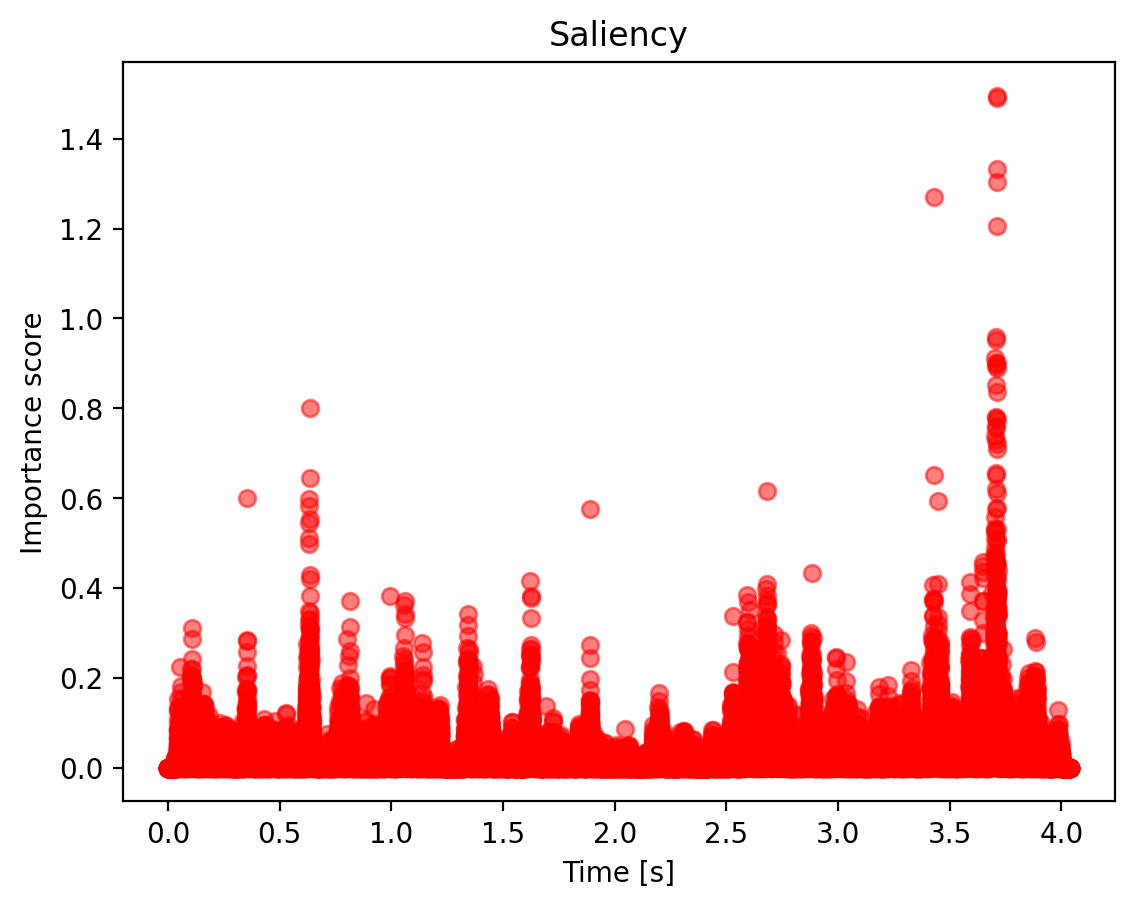

In [ ]:
plt.scatter(time, saliency_attributions[0], color="red", label="saliency", alpha=0.5)
plt.title("Saliency")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Text(0, 0.5, 'Importance score')

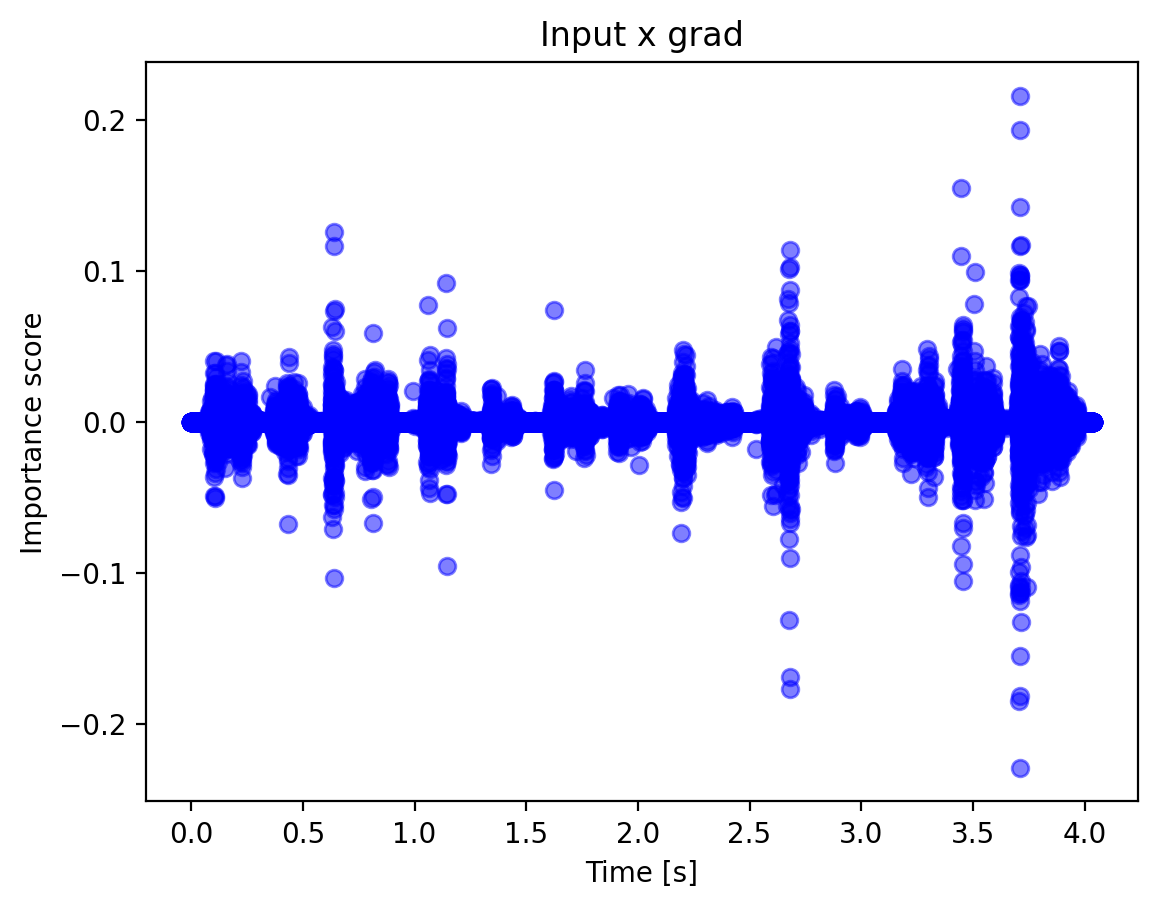

In [ ]:
plt.scatter(time, input_grad_attributions[0], color="blue", label="input x grad", alpha=0.5)
plt.title("Input x grad")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Note that some elements can contribute positively towards the class and some can negatively. Usually we are interested in what features "support" the class, so we take $\max(\text{attribution}, 0)$

In [ ]:
input_grad_attributions = nn.functional.relu(input_grad_attributions) # max(x, 0)
saliency_attributions = nn.functional.relu(saliency_attributions)

Also scores can be very small. When plotting, we want to see which elements in the input contribute more than others. We may not care about specific value of the attribution score. So, we normalize to [0, 1]

In [ ]:
saliency_attributions = saliency_attributions / saliency_attributions.max()
input_grad_attributions = input_grad_attributions / input_grad_attributions.max()

Text(0, 0.5, 'Importance score/Amplitude')

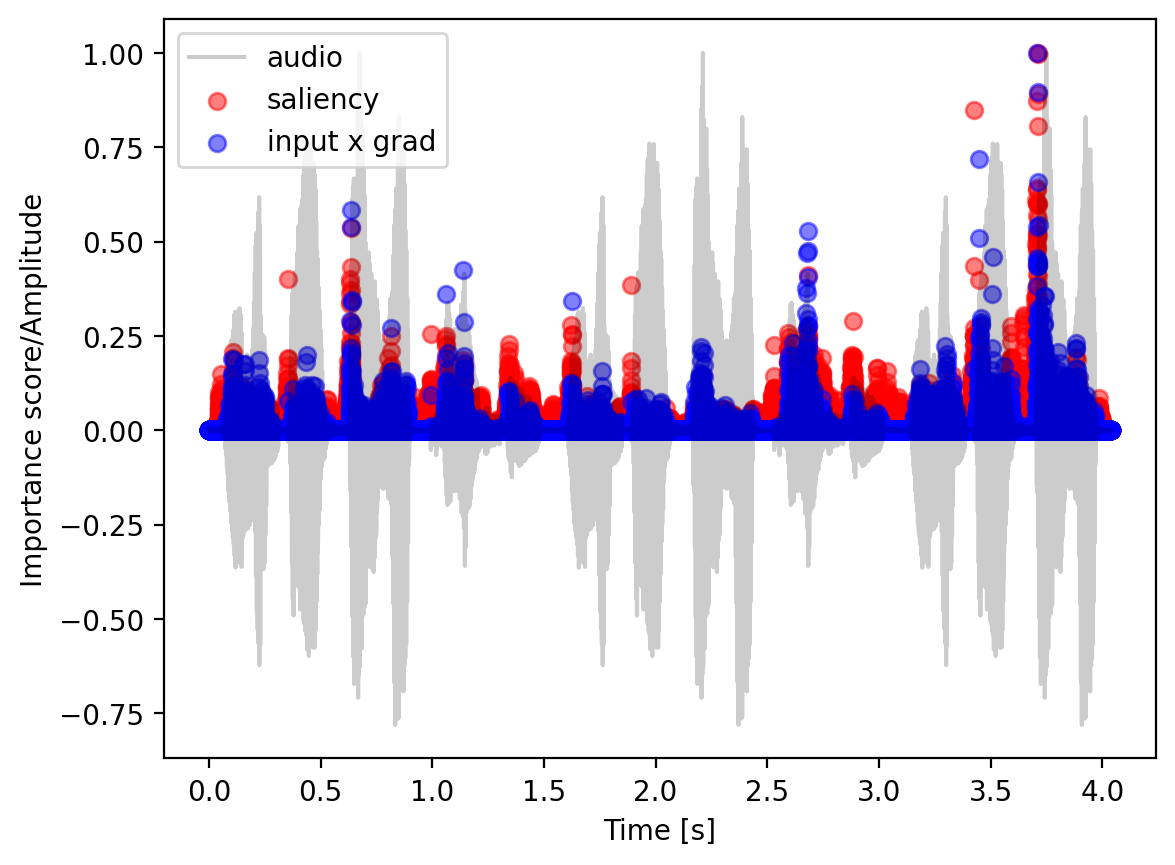

In [ ]:
plt.plot(time, prepared_spoof[0], color="black", label="audio", alpha=0.2)
plt.scatter(time, saliency_attributions[0], color="red", label="saliency", alpha=0.5)
plt.scatter(time, input_grad_attributions[0], color="blue", label="input x grad", alpha=0.5)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Importance score/Amplitude")

Let's compare it with a more advanced technique -- Lime.



In [ ]:
from captum.attr import Lime

lime_attr = Lime(model)

Lime will try to interpret all features independently, i.e. 64600 features. Which might be too much. Also, individual point perturbation may not be representative. So let's group features into windows

In [ ]:
window_size = 646
num_windows = prepared_spoof.shape[-1] // window_size
feature_mask = torch.arange(num_windows).repeat_interleave(window_size)
feature_mask = feature_mask.unsqueeze(0).to(device) # should be the same shape as prepared_audio, put on device

feature_mask_big = torch.arange(num_windows // 10).repeat_interleave(window_size * 10)
feature_mask_big = feature_mask_big.unsqueeze(0).to(device)
feature_mask, feature_mask_big

(tensor([[ 0,  0,  0,  ..., 99, 99, 99]], device='cuda:0'),
 tensor([[0, 0, 0,  ..., 9, 9, 9]], device='cuda:0'))

In [ ]:
lime_attributions_group = lime_attr.attribute(prepared_spoof.to(device), target=0, feature_mask=feature_mask).detach().cpu()
lime_attributions_group_big = lime_attr.attribute(prepared_spoof.to(device), target=0, feature_mask=feature_mask_big).detach().cpu()

lime_attributions_individual = lime_attr.attribute(prepared_spoof.to(device), target=0).detach().cpu()


/usr/local/lib/python3.12/dist-packages/captum/attr/_core/lime.py:1141: UserWarning: Attempting to construct interpretable model with > 10000 features.This can be very slow or lead to OOM issues. Please provide a featuremask which groups input features to reduce the number of interpretablefeatures. 
  warnings.warn(


In [ ]:
plt.scatter(time, lime_attributions_individual[0], color="green", label="lime indiv", alpha=0.5)
plt.title("Lime Individual")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Text(0, 0.5, 'Importance score')

Text(0, 0.5, 'Importance score')

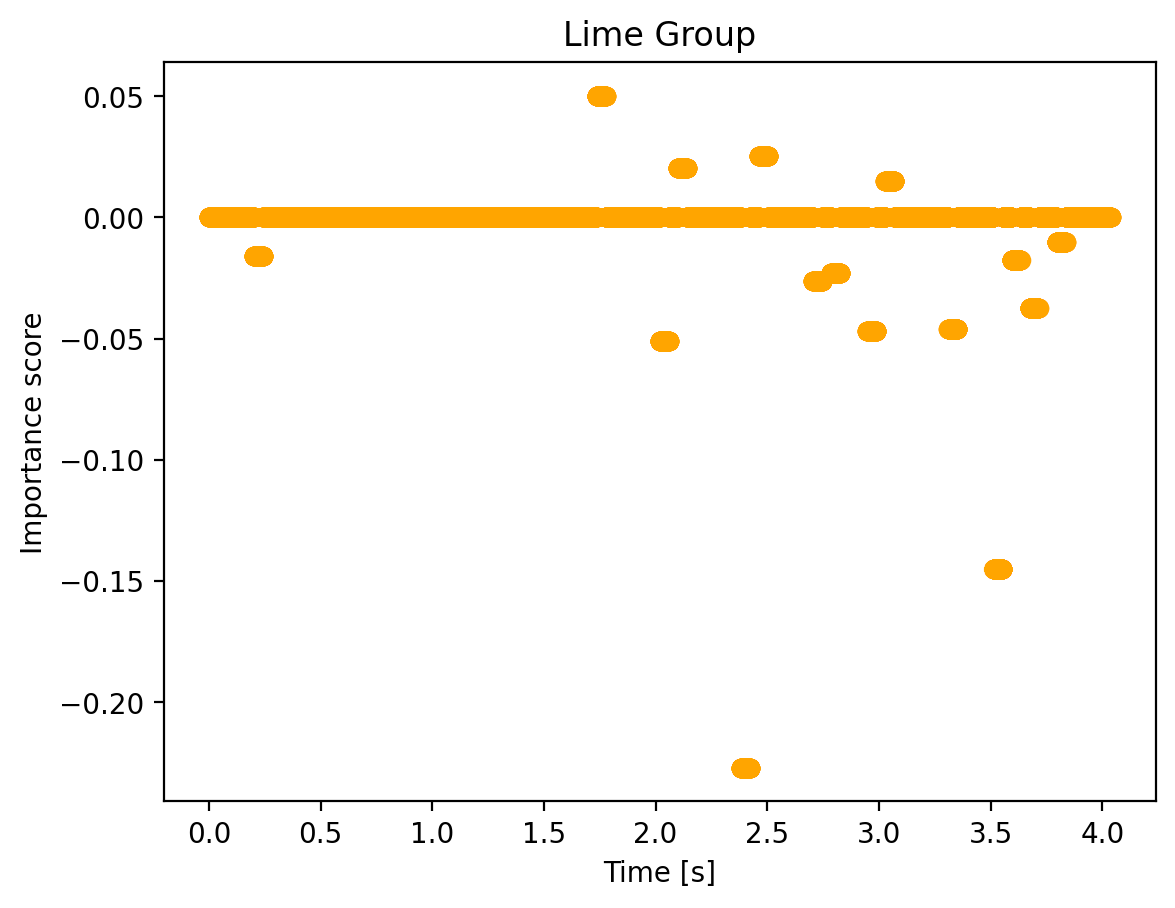

In [ ]:
plt.scatter(time, lime_attributions_group[0], color="orange", label="lime group", alpha=0.5)
plt.title("Lime Group")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Text(0, 0.5, 'Importance score')

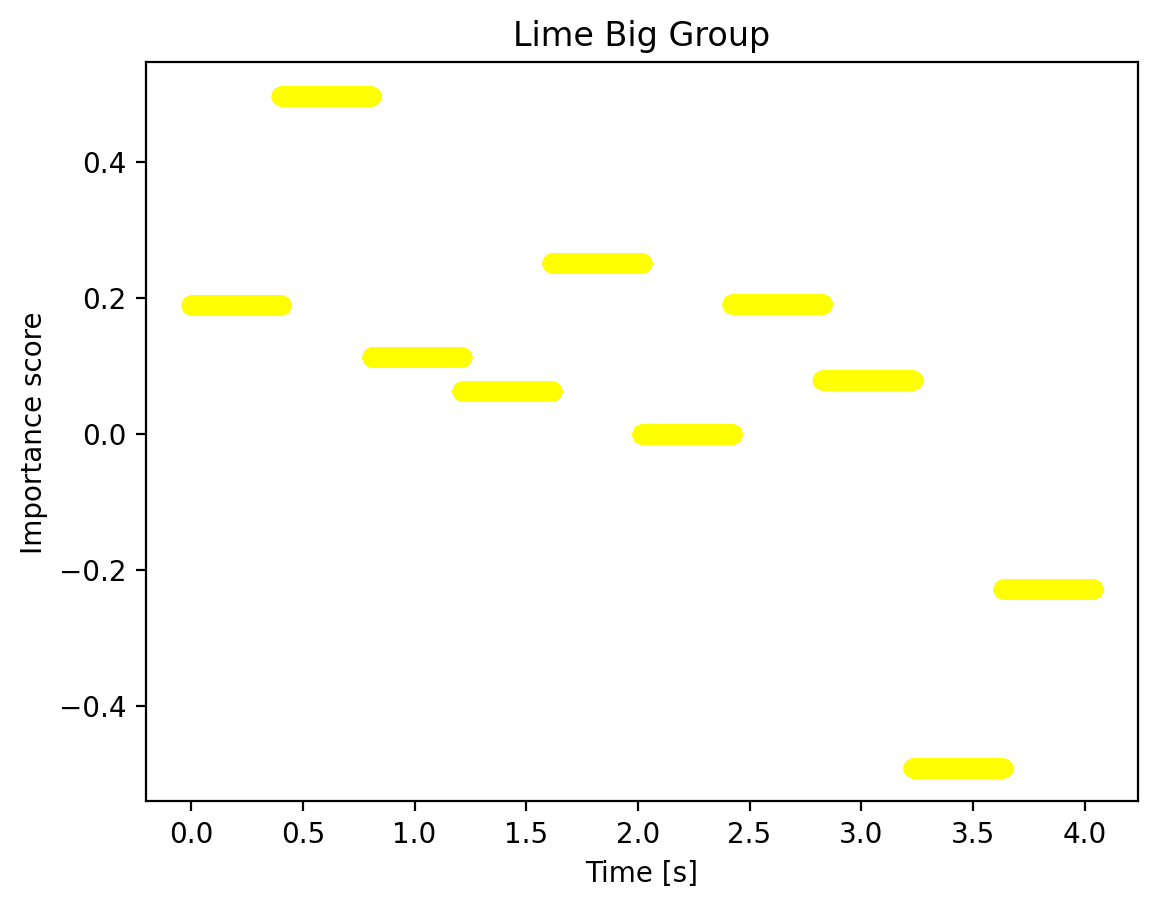

In [ ]:
plt.scatter(time, lime_attributions_group_big[0], color="yellow", label="lime big group", alpha=0.5)
plt.title("Lime Big Group")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Again, let's normalize and take max. Then plot

In [ ]:
lime_attributions = nn.functional.relu(lime_attributions)
lime_attributions = lime_attributions / lime_attributions.max()

lime_attributions_group = nn.functional.relu(lime_attributions_group)
lime_attriblime_attributions_grouputions = lime_attributions_group / lime_attributions_group.max()

lime_attributions_group_big = nn.functional.relu(lime_attributions_group_big)
lime_attributions_group_big = lime_attributions_group_big / lime_attributions_group_big.max()

Text(0, 0.5, 'Importance score/Amplitude')

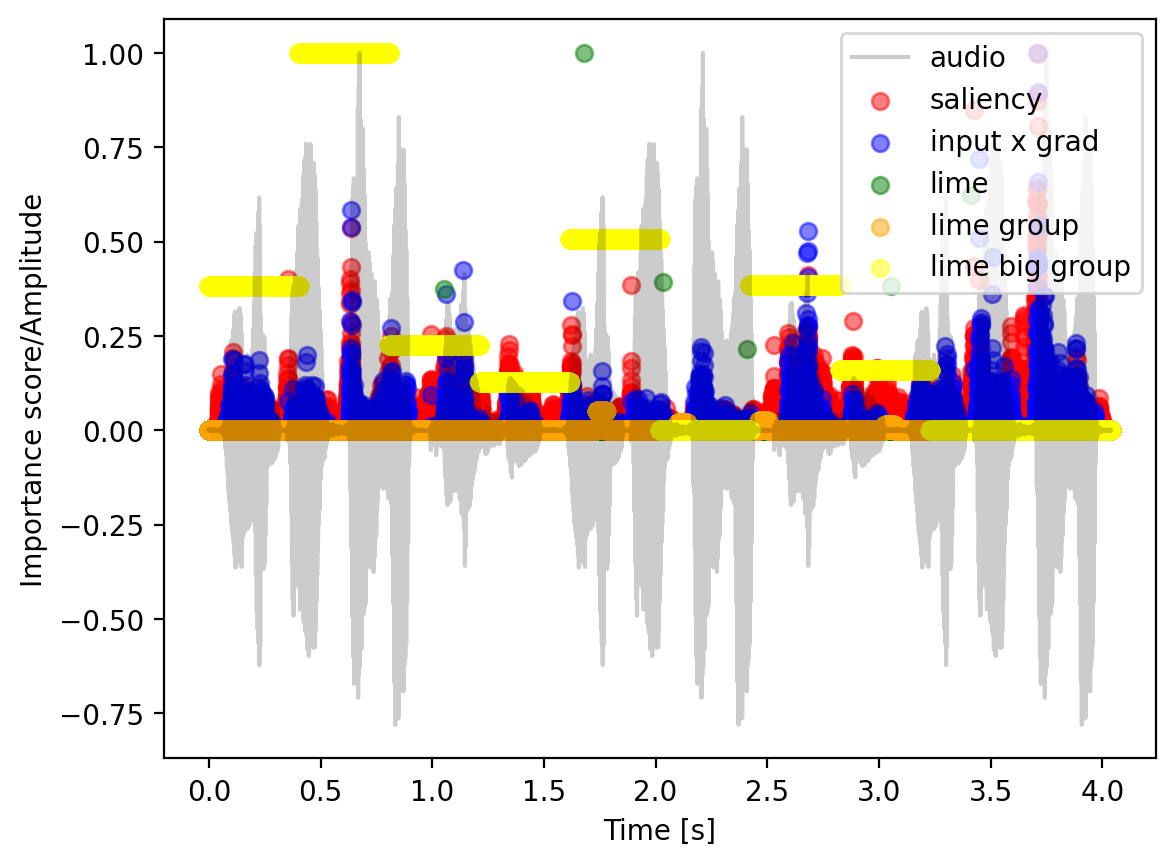

In [ ]:
plt.plot(time, prepared_spoof[0], color="black", label="audio", alpha=0.2)
plt.scatter(time, saliency_attributions[0], color="red", label="saliency", alpha=0.5)
plt.scatter(time, input_grad_attributions[0], color="blue", label="input x grad", alpha=0.5)
plt.scatter(time, lime_attributions[0], color="green", label="lime", alpha=0.5)
plt.scatter(time, lime_attributions_group[0], color="orange", label="lime group", alpha=0.5)
plt.scatter(time, lime_attributions_group_big[0], color="yellow", label="lime big group", alpha=0.5)

plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Importance score/Amplitude")

You see that all these methods show different picture -- a common problem in deepfakes and some other tasks when it comes to XAI

But the problem is worse than you think:

In [ ]:
lime_attributions_group = lime_attr.attribute(prepared_spoof.to(device), target=0, feature_mask=feature_mask).detach().cpu()
lime_attributions_group_other = lime_attr.attribute(prepared_spoof.to(device), target=0, feature_mask=feature_mask).detach().cpu()
lime_attributions_group_other_2 = lime_attr.attribute(prepared_spoof.to(device), target=0, feature_mask=feature_mask).detach().cpu()


Text(0, 0.5, 'Importance score')

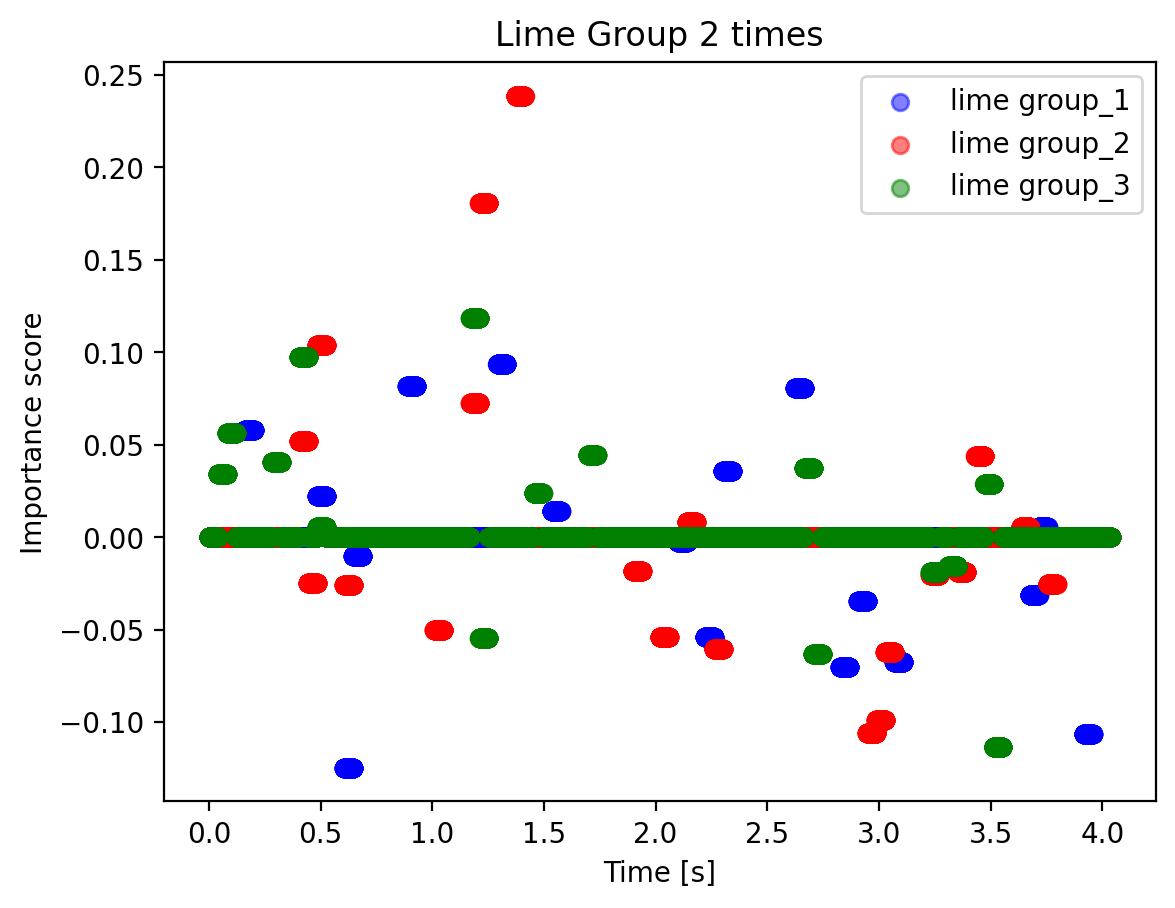

In [ ]:
plt.scatter(time, lime_attributions_group[0], color="blue", label="lime group_1", alpha=0.5)
plt.scatter(time, lime_attributions_group_other[0], color="red", label="lime group_2", alpha=0.5)
plt.scatter(time, lime_attributions_group_other_2[0], color="green", label="lime group_3", alpha=0.5)

plt.legend()
plt.title("Lime Group 2 times")
plt.xlabel("Time [s]")
plt.ylabel("Importance score")

Different seeds -- remarkably different explanations

# ASV

Many ASV systems can be found online. In this seminar, we will utilize Nvidia NeMo, which you may have already seen for the ASR data.

With NeMo, it is quite easy to inference the model.

In [ ]:
!pip install nemo-toolkit[all]

In [ ]:
import nemo.collections.asr as nemo_asr

In [ ]:
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name='ecapa_tdnn')
model.eval()
model.to(device)

[NeMo I 2025-10-23 18:08:14 nemo_logging:393] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/ecapa_tdnn/versions/1.16.0/files/ecapa_tdnn.nemo to /root/.cache/torch/NeMo/NeMo_2.5.1/ecapa_tdnn/3e0c5c4731b176aeb70c29a74d800c81/ecapa_tdnn.nemo
[NeMo I 2025-10-23 18:08:16 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-10-23 18:08:17 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    time_length: 3
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2025-10-23 18:08:17 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validati

[NeMo I 2025-10-23 18:08:17 nemo_logging:393] PADDING: 16
[NeMo I 2025-10-23 18:08:18 nemo_logging:393] Model EncDecSpeakerLabelModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.5.1/ecapa_tdnn/3e0c5c4731b176aeb70c29a74d800c81/ecapa_tdnn.nemo.


EncDecSpeakerLabelModel(
  (loss): AngularSoftmaxLoss()
  (eval_loss): AngularSoftmaxLoss()
  (_accuracy): TopKClassificationAccuracy()
  (preprocessor): AudioToMelSpectrogramPreprocessor(
    (featurizer): FilterbankFeatures()
  )
  (encoder): ECAPAEncoder(
    (layers): ModuleList(
      (0): TDNNModule(
        (conv_layer): Conv1d(80, 1024, kernel_size=(5,), stride=(1,), padding=(2,))
        (activation): ReLU()
        (bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x TDNNSEModule(
        (group_tdnn_block): Sequential(
          (0): TDNNModule(
            (conv_layer): Conv1d(1024, 1024, kernel_size=(1,), stride=(1,))
            (activation): ReLU()
            (bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (1): Conv1d(1024, 1024, kernel_size=(3,), stride=(1,), padding=(1,), groups=8)
          (2): ReLU()
          (3): BatchNorm1d(1024, eps=1e-05, m

In [ ]:
import numpy as np

def embedding_normalize(embs, eps=1e-10):
    """
    Mean and L2 length normalize speaker embeddings.

    Args:
        embs: np.ndarray of shape (B, D)
    Returns:
        np.ndarray of shape (B, D), normalized
    """
    # always apply per-row L2 normalization
    l2 = np.linalg.norm(embs, ord=2, axis=1, keepdims=True) + eps
    embs = embs / l2
    return embs

In [ ]:
def get_embedding(audio, model):
    audio = audio.to(device)
    audio_len = torch.tensor(audio.shape[-1]).unsqueeze(0).to(device)
    _, emb = model(input_signal=audio, input_signal_length=audio_len)
    emb = emb.squeeze().detach().cpu().numpy()
    if len(emb.shape) == 1:  # batch-size = 1
        emb = emb[None, :]
    emb = embedding_normalize(emb)
    return torch.tensor(emb)

In [ ]:
def is_the_same_speaker(emb1, emb2, threshold=0.7):
  cos = torch.nn.functional.cosine_similarity(
      emb1, emb2, dim=1, eps=1e-8
  )  # [-1, 1], shape [B]

  # go from [-1, 1] to [0, 1]
  sim01 = (cos + 1.0) * 0.5

  print("Cos score:", sim01)

  return (sim01 >= threshold)


Let's check how it works. Bonafide1 -- and spoof1 are actually the same speaker (one real, one fake version of the speaker). Bonafide1_another -- another example from the same speaker. Spoof3 and bonafide2 -- other people.

In [ ]:
import torchaudio
from IPython.display import Audio

# for speaker LA_0079

bonafide1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_3999087.flac'
bonafide1_path_another = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_1272637.flac'

spoof1_path = './LA/LA/ASVspoof2019_LA_train/flac/LA_T_7962577.flac' # A05 (VC)

# another speaker

spoof3_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_4920751.flac' # A17 (VC)
bonafide2_path = './LA/LA/ASVspoof2019_LA_eval/flac/LA_E_7991213.flac'



bonafide1_audio, sr = torchaudio.load(bonafide1_path)
bonafide1_audio_another, sr = torchaudio.load(bonafide1_path_another)

bonafide2_audio, sr = torchaudio.load(bonafide2_path)

spoof1_audio, sr = torchaudio.load(spoof1_path)
spoof3_audio, sr = torchaudio.load(spoof3_path)

In [ ]:
Audio(bonafide1_audio, rate=sr)

In [ ]:
Audio(bonafide1_audio_another, rate=sr)

In [ ]:
Audio(bonafide2_audio, rate=sr)

In [ ]:
Audio(spoof1_audio, rate=sr)

In [ ]:
Audio(spoof3_audio, rate=sr)

In [ ]:
bona1_emb = get_embedding(bonafide1_audio, model)
bona1_emb_another = get_embedding(bonafide1_audio_another, model)

bona2_emb = get_embedding(bonafide2_audio, model)

spoof1_emb = get_embedding(spoof1_audio, model)
spoof3_emb = get_embedding(spoof3_audio, model)

In [ ]:
is_the_same_speaker(bona1_emb, bona1_emb_another)

Cos score: tensor([0.7642])


tensor([True])

In [ ]:
is_the_same_speaker(bona1_emb, spoof1_emb)

Cos score: tensor([0.6140])


tensor([False])

In [ ]:
is_the_same_speaker(bona1_emb, spoof3_emb)

Cos score: tensor([0.6842])


tensor([False])

In [ ]:
is_the_same_speaker(bona1_emb, bona2_emb)

Cos score: tensor([0.5408])


tensor([False])